In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn.datasets


# Chargement des données disponible dans le package sklearn
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [21]:
#http://josephsalmon.eu/enseignement/TELECOM/formationML/J1_TP_Digits.html

In [30]:
print(digits.data.shape)

(1797, 64)


In [28]:
print(digits.target.shape)

(1797,)


<Figure size 432x288 with 0 Axes>

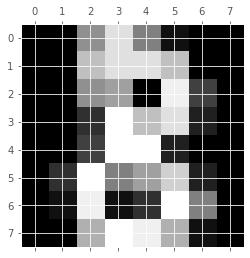

In [135]:
import pylab as pl 
pl.gray() 
pl.matshow(df.images[8]) 
pl.show() 

In [25]:
print("Nombre de pixels :      {}".format(X.shape[1]))
print("Nombre d'observations : {}".format(X.shape[0]))
print("Nombre de classes :     {}".format(len(np.unique(y))))

# Choix d'une observation quelconques de la base
idx_to_test = 15

print("Affichage d'une ligne de la matrice / image:")
print(X[idx_to_test, :])
print("Affichage de la classe / chiffre associé:")
print(y[idx_to_test])

Nombre de pixels :      64
Nombre d'observations : 1797
Nombre de classes :     10
Affichage d'une ligne de la matrice / image:
[ 0.  5. 12. 13. 16. 16.  2.  0.  0. 11. 16. 15.  8.  4.  0.  0.  0.  8.
 14. 11.  1.  0.  0.  0.  0.  8. 16. 16. 14.  0.  0.  0.  0.  1.  6.  6.
 16.  0.  0.  0.  0.  0.  0.  5. 16.  3.  0.  0.  0.  1.  5. 15. 13.  0.
  0.  0.  0.  4. 15. 16.  2.  0.  0.  0.]
Affichage de la classe / chiffre associé:
5


In [27]:
# Récupérer les modalités possible prises (Il y en a bien 10!) 
classes_list = np.unique(y).astype(int)
print("Liste des classes en présence: ", classes_list)

Liste des classes en présence:  [0 1 2 3 4 5 6 7 8 9]


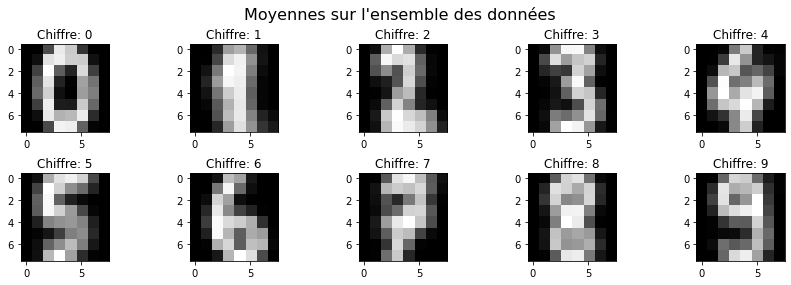

In [31]:
# Calculer un représentant moyen pour chaque chiffre 
Xi_mean = [np.mean(X[y == cls], axis=0) for cls in classes_list]

# Fonction d'affichage d'une liste d'image
def disp_pics(pic_list, title=''):
    """" Fonction qui affiche une liste d'image codée en vecteur """""
    fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12, 4))
    plt.suptitle(title, fontsize=16)
    for i in range(10):
        opt = dict(cmap='gray', aspect='equal', interpolation='nearest')
        axs.flat[i].imshow(pic_list[i].reshape(8, 8), **opt)
        axs.flat[i].set_title("Chiffre: %s" % i)
    # Contre-balancer l'affichage pas terrible de matplotlib
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)

# Affichage des images moyennes par classe pour les données  
disp_pics(Xi_mean, title=(u"Moyennes sur l'ensemble des données"))

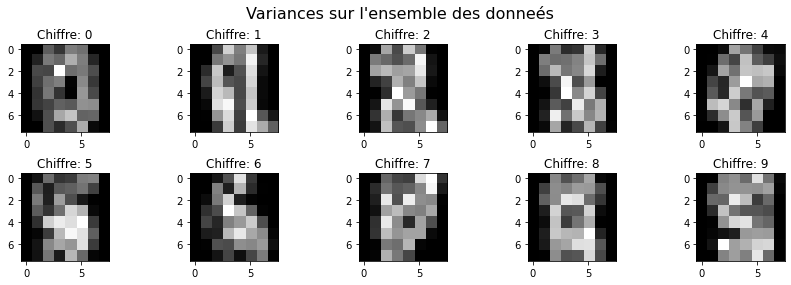

In [32]:
# Calculer de la variance par chiffre 
Xi_var = [np.var(X[y == cls], axis=0) for cls in classes_list]
# Affichage des images de variance par classe pour les données 
disp_pics(Xi_var, title=(u"Variances sur l'ensemble des donneés"))

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6,
                                                    random_state=0)
print("Nb d'échantillons d'apprentissage (train) :  {}".format(X_train.shape[0]))
print("Nb d'échantillons de validation (test):    {}".format(X_test.shape[0]))

Nb d'échantillons d'apprentissage (train) :  1078
Nb d'échantillons de validation (test):    719


In [126]:
#svm.linearSVC
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, r2_score
from sklearn.svm import SVC


clf_svm_linear_svc1 = svm.SVC(kernel='linear', C = 1.0)
clf_svm_linear_svc100 = svm.SVC(kernel='linear', C = 100.0)
# Make and fit SVMs with Gaussian Kernel
svm_gauss1 = SVC(kernel="rbf", gamma="auto", C=1)
svm_gauss1e6 = SVC(kernel="rbf", gamma="auto", C=1e6)
svc_sansp = SVC(gamma='scale')
#SVC sans parametre , je ne sais si ca marche ah 
#parametre c : terme de ponderation, controle biais/variance



SVC(kernel='linear')

In [127]:
svc_sansp.fit(X_train,y_train)

SVC()

In [128]:
print(svc_sansp.predict(X_train))

[6 5 3 ... 7 7 8]


In [67]:
prediction_svmsvc = clf.predict(X_test)
r2_score(y_test, prediction_svmsvc)

0.9349985438709503

In [72]:

# Chargement de deux autres mesure de performance
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score, recall_score

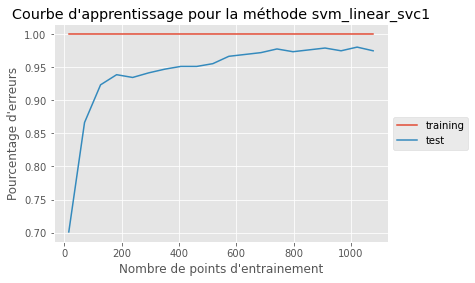

In [73]:
#graphique des courbes d'apprentissage 
N_range = np.linspace(15, X_train.shape[0], 20).astype(int)

clf = clf_svm_linear_svc1  
clf_name = 'svm_linear_svc1'# choix de la méthode LDA comme premier classifieur

def plot_learning_curve(clf, clf_name):
    training_error = []
    test_error = []

    for N in N_range:
        XN = X_train[:N]
        yN = y_train[:N]
        clf.fit(XN, yN)        
        training_error.append(accuracy_score(clf.predict(XN), yN))
        test_error.append(accuracy_score(clf.predict(X_test), y_test))
    plt.figure()
    plt.plot(N_range, training_error, label='training')
    plt.plot(N_range, test_error, label='test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(u'Courbe d\'apprentissage pour la méthode ' + clf_name)
    plt.xlabel('Nombre de points d\'entrainement')
    plt.ylabel('Pourcentage d\'erreurs')
    
plot_learning_curve(clf,clf_name)

In [130]:


# Chargement d'une autre méthode de classification (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Liste des classifieurs évalués
classifiers = [('KNN_k=1', KNeighborsClassifier(n_neighbors=1)),
              ('SVM linear SVC c=1', svm.SVC(kernel='linear', C = 1.0)),
              ('SVM linear SVC c=100', svm.SVC(kernel='linear', C = 100.0)),
               ('svm_gauss1', SVC(kernel="rbf", gamma="auto", C=1)),
               ('svm_gauss1e6', SVC(kernel="rbf", gamma="auto", C=1e6)),
               ('SVM_SVC',SVC(gamma='scale'))
              ]




In [131]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd        # charge un package pour le traitement des données
from timeit import timeit  # charge un package pour des mesures de temps
from sklearn.model_selection import cross_val_score

# Definition des métriques de performance
def perf_compute(clf, name, loops=10):
    """
    Calcule le temps d'apprentissage, de prediction, le score
    et la matrice de confusion d'un classifieur
    """
    # On initialise le conteneur
    perf = pd.Series(name=name,dtype=pd.StringDtype())
    # On crée les callables qu'on passera à la fonction de profiling
    fit = lambda: clf.fit(X_train, y_train)
    score = lambda: clf.score(X_test, y_test)

    # On profile le temps des phases d'entrainement et de prédiction en ms
    perf['train_tps'] = timeit(fit, number=loops) / loops * 1000
    perf['test_tps'] = timeit(score, number=loops) / loops * 1000
    perf['total_tps'] = perf.train_tps + perf.test_tps
    # On calcule le score en pourcentage
    perf['score'] = fit().score(X_test, y_test) * 100
    # On calcule la matrice de confusion
    perf['conf_mat'] = [confusion_matrix(fit().predict(X_test), y_test)]
    # Normalisation par ligne de la matrice de confusion  pour avoir des pourcentages d'erreurs.
    # cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    return perf


In [132]:
test = perf_compute(KNeighborsClassifier(n_neighbors=1), "voila", loops=10)

In [133]:
print(test)

train_tps                                              2.72997
test_tps                                               73.3246
total_tps                                              76.0546
score                                                  98.7483
conf_mat     [[[60, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 73, 0, ...
Name: voila, dtype: object


In [134]:
# On lance le calcule de performance. On profile en bouclant 100 fois
perfs = pd.DataFrame([perf_compute(clf, name) for name, clf in classifiers])
perfs = perfs.sort_values(by='score')

perfs['train_tps test_tps total_tps score'.split()].T

,svm_gauss1,svm_gauss1e6,SVM linear SVC c=1,SVM linear SVC c=100,KNN_k=1,SVM_SVC
train_tps,183.355682,182.454349,19.939292,19.895240,2.659655,37.500403
test_tps,58.441493,55.707659,14.236662,14.463060,73.168776,27.178577
total_tps,241.797175,238.162007,34.175954,34.358300,75.828431,64.678979
score,35.465925,40.611961,97.496523,97.496523,98.748261,98.887344


In [ ]:
#pour voir la matrice de confusion 
#et voir les erreurs de prediction dans une matrice 
#https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py